# Import Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pickle

# Load Dataset

In [47]:
df= pd.read_csv('../data/house_price_dataset.csv')
df.head()

,HouseSize_sqft,Bedrooms,Bathrooms,LocationScore,Price
0,1460,2,1,4,845854
1,1894,1,3,7,1353584
2,1730,2,1,3,851123
3,1695,5,2,6,1291142
4,2238,2,3,2,955180


#Dataset info

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   HouseSize_sqft  50 non-null     int64
 1   Bedrooms        50 non-null     int64
 2   Bathrooms       50 non-null     int64
 3   LocationScore   50 non-null     int64
 4   Price           50 non-null     int64
dtypes: int64(5)
memory usage: 2.1 KB


# Correlation Heatmap

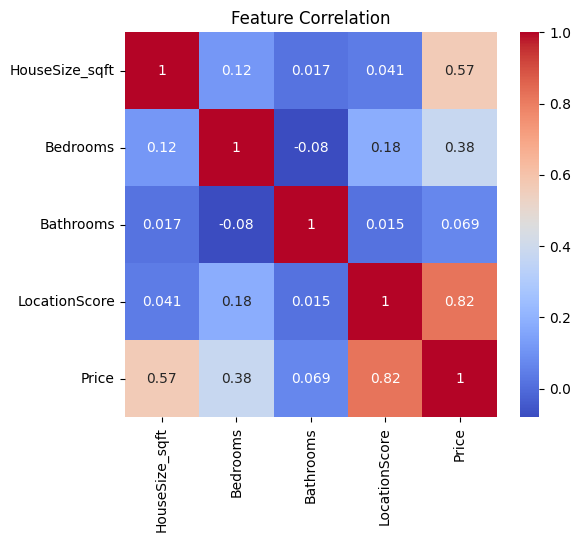

In [49]:
plt.figure(figsize=(6, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

# Price Distibution

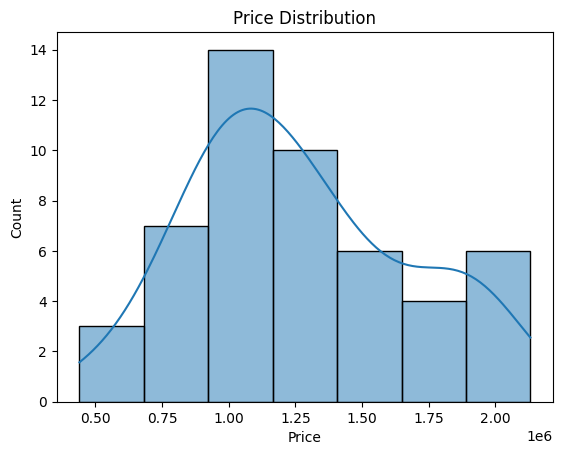

In [50]:
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution")
plt.show()

# Feature vs Price

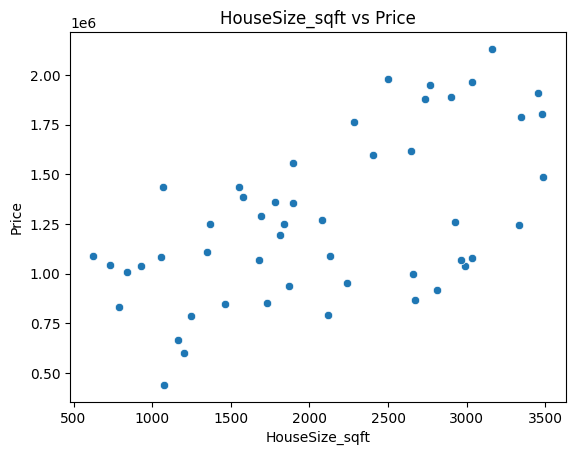

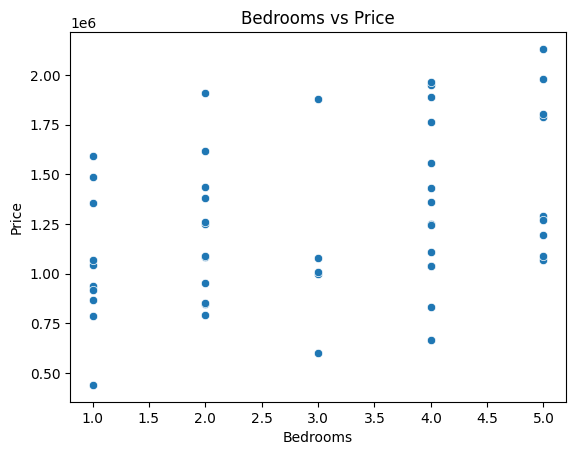

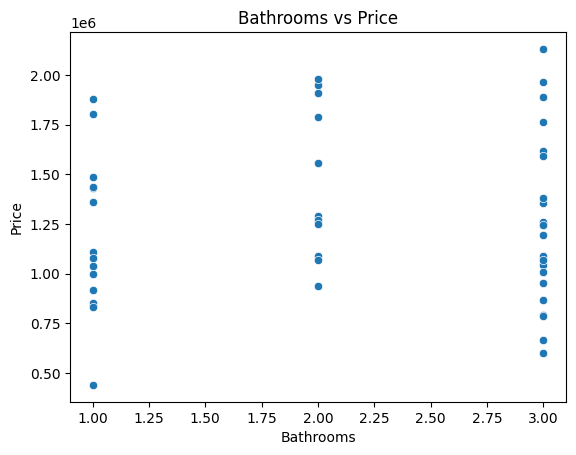

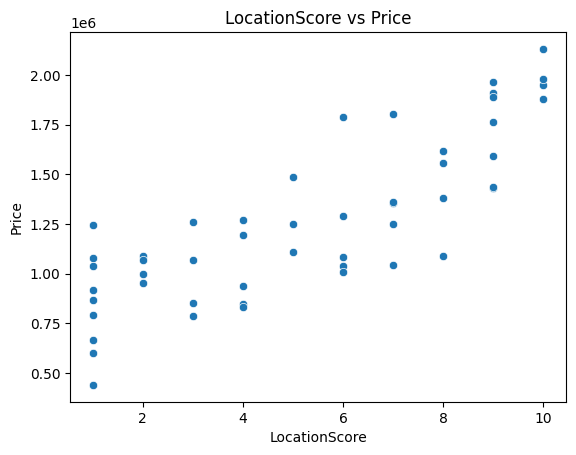

In [51]:
features = ['HouseSize_sqft', 'Bedrooms', 'Bathrooms', "LocationScore"]
for col in features:
    sns.scatterplot(x= df[col], y = df['Price'])
    plt.title(f"{col} vs Price")
    plt.show()


# Feature Engineering & Scaling

In [52]:
x = df.drop('Price', axis=1)
y = df['Price']

In [53]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)


In [54]:
# Feature Scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


# Model Train

In [55]:
model = LinearRegression()
model = model.fit(x_train_scaled, y_train)

# Model Evaluation

In [57]:
y_pred = model.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 33533.30478006114
MSE: 1432660332.8032544
RMSE: 37850.49976953084
R2 Score: 0.9917836253581226


# Train vs Test Score Compare

In [58]:
print("Train R2:", model.score(x_train_scaled, y_train))
print("Test R2 :", model.score(x_test_scaled, y_test))

Train R2: 0.9947555053475098
Test R2 : 0.9917836253581226


# Actual vs Predicted Visualization

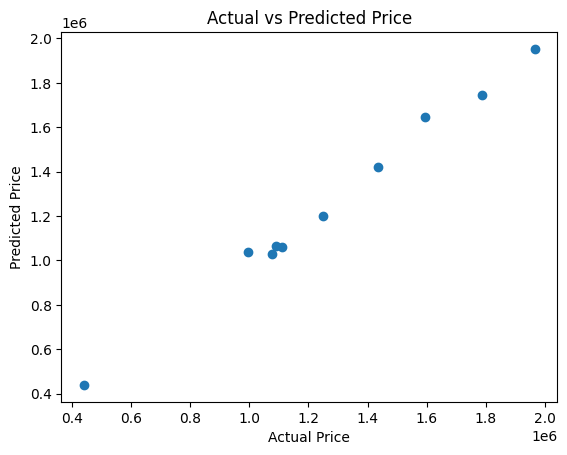

In [60]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.show()

# Save Model & Scaler

In [61]:
pickle.dump(model, open("../models/house_price_model.pkl", "wb"))
pickle.dump(scaler, open("../models/scaler.pkl", 'wb'))